In [2]:
import os
import time
import numpy as np
import pandas as pd

import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix

import keras
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense
     
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization,Bidirectional,LSTM

from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
    
! for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done

a was unexpected at this time.


In [3]:
for dirname, _, filenames in os.walk("D:\schizophrenia_code\data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\schizophrenia_code\data\data_part1\columnLabels.csv
D:\schizophrenia_code\data\data_part1\demographic.csv
D:\schizophrenia_code\data\data_part1\ERPdata.csv
D:\schizophrenia_code\data\data_part1\mergedTrialData.csv
D:\schizophrenia_code\data\data_part1\time.csv
D:\schizophrenia_code\data\data_part1\1.csv\1.csv
D:\schizophrenia_code\data\data_part1\10.csv\10.csv
D:\schizophrenia_code\data\data_part1\11.csv\11.csv
D:\schizophrenia_code\data\data_part1\12.csv\12.csv
D:\schizophrenia_code\data\data_part1\13.csv\13.csv
D:\schizophrenia_code\data\data_part1\14.csv\14.csv
D:\schizophrenia_code\data\data_part1\15.csv\15.csv
D:\schizophrenia_code\data\data_part1\16.csv\16.csv
D:\schizophrenia_code\data\data_part1\17.csv\17.csv
D:\schizophrenia_code\data\data_part1\18.csv\18.csv
D:\schizophrenia_code\data\data_part1\19.csv\19.csv
D:\schizophrenia_code\data\data_part1\2.csv\2.csv
D:\schizophrenia_code\data\data_part1\20.csv\20.csv
D:\schizophrenia_code\data\data_part1\21.csv\21.csv
D:\schizophr

In [4]:
demographic = pd.read_csv("D:/schizophrenia_code/data/data_part1/demographic.csv")
demographic

,subject,group,gender,age,education
0,1,0,M,44,16.0
1,2,0,M,39,17.0
2,3,0,M,53,18.0
3,4,0,M,52,15.0
4,5,0,M,41,16.0
...,...,...,...,...,...
76,77,1,M,28,13.0
77,78,1,F,32,16.0
78,79,1,M,37,16.0
79,80,1,M,33,13.0


In [5]:
demographic[" group"].mean()

0.6049382716049383

In [6]:
demographic[" group"].value_counts()

 group
1    49
0    32
Name: count, dtype: int64

In [7]:
for i, t in enumerate(list(demographic[" group"])):
    if t:
        print(f"{i} - Schizophrenia")
    else:
        print(f"{i} - HEALTHY")

0 - HEALTHY
1 - HEALTHY
2 - HEALTHY
3 - HEALTHY
4 - HEALTHY
5 - HEALTHY
6 - HEALTHY
7 - HEALTHY
8 - HEALTHY
9 - HEALTHY
10 - HEALTHY
11 - HEALTHY
12 - HEALTHY
13 - HEALTHY
14 - HEALTHY
15 - HEALTHY
16 - HEALTHY
17 - HEALTHY
18 - HEALTHY
19 - HEALTHY
20 - HEALTHY
21 - HEALTHY
22 - HEALTHY
23 - HEALTHY
24 - Schizophrenia
25 - Schizophrenia
26 - Schizophrenia
27 - Schizophrenia
28 - Schizophrenia
29 - Schizophrenia
30 - Schizophrenia
31 - Schizophrenia
32 - Schizophrenia
33 - Schizophrenia
34 - Schizophrenia
35 - Schizophrenia
36 - Schizophrenia
37 - Schizophrenia
38 - Schizophrenia
39 - Schizophrenia
40 - Schizophrenia
41 - Schizophrenia
42 - Schizophrenia
43 - Schizophrenia
44 - Schizophrenia
45 - Schizophrenia
46 - Schizophrenia
47 - Schizophrenia
48 - Schizophrenia
49 - Schizophrenia
50 - Schizophrenia
51 - Schizophrenia
52 - Schizophrenia
53 - Schizophrenia
54 - Schizophrenia
55 - Schizophrenia
56 - Schizophrenia
57 - Schizophrenia
58 - HEALTHY
59 - HEALTHY
60 - HEALTHY
61 - HEALTHY


In [8]:
diagnosis_dict = dict(zip(demographic.subject, demographic[" group"]))
del demographic

In [9]:
electrodes_list = list(pd.read_csv("D:\schizophrenia_code\data\data_part1\columnLabels.csv").columns[4:])
print("Electrodes List \n",electrodes_list)

Electrodes List 
 ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'VEOa', 'VEOb', 'HEOL', 'HEOR', 'Nose', 'TP10']


In [10]:
def averaged_by_N_rows(a, n):
    """ 
    A function that averages n rows in a matrix
    """
    shape = a.shape
    assert len(shape) == 2
    assert shape[0] % n == 0
    b = a.reshape(shape[0] // n, n, 
                  shape[1])
    mean_vec = b.mean(axis=1)
    return mean_vec

In [22]:
N_AVERAGED = 16
X = np.zeros((81 * 100,  9216 * len(electrodes_list) // N_AVERAGED), dtype="float32")
Y = np.zeros(len(X))

part1_path = "D:\schizophrenia_code\data\data_part1"
part2_path = "D:\schizophrenia_code\data\data_part2"

# We pull out only those experiments where there were 9216 measurements (most often named so many times)
x_counter = 0
column_list = pd.read_csv("D:\schizophrenia_code\data\data_part1\columnLabels.csv").columns
for person_number in tqdm(range(1, 81 + 1)):


    csv_path = f"{part1_path}/{person_number}.csv/{person_number}.csv"
    if not os.path.exists(csv_path):
        csv_path = f"{part2_path}/{person_number}.csv/{person_number}.csv"
    df = pd.read_csv(csv_path, 
                header=None,
                names=column_list)
    trials_list = set(df.trial)


    for t1, trial_number in enumerate(trials_list):
        number_of_trials = len(df[df.trial == trial_number])
        if number_of_trials == 9216.0:
            current_sample_matrix = df[df.trial == trial_number][electrodes_list].values
            averaged_by_N = averaged_by_N_rows(current_sample_matrix, n=N_AVERAGED)
            averaged_by_N_big_vec = averaged_by_N.reshape(-1)
            X[x_counter] = averaged_by_N_big_vec.astype(np.float32)
            Y[x_counter] = diagnosis_dict[person_number]
            x_counter += 1
print("Total trials with the Appropriate number of measurements - ", x_counter)
X = X[: x_counter]
Y = Y[: x_counter]
        
print("Total trials with the Appropriate number of measurements- ", x_counter)

  0%|          | 0/81 [00:00<?, ?it/s]

Total trials with the Appropriate number of measurements -  7092
Total trials with the Appropriate number of measurements-  7092


In [23]:
X.shape

(7092, 40320)

In [24]:
Y.shape

(7092,)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [26]:
X_norm = (normalize(X.reshape(-1, 70), axis=0, norm='max')).reshape(X.shape)

In [27]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm, Y, test_size=0.2, shuffle=True, random_state=42)

In [28]:
X_norm = X

In [29]:
X_train_2d = X_train_norm.reshape(X_train_norm.shape[0], len(electrodes_list), X_train_norm.shape[1] // len(electrodes_list), 1)
# X_train_2D = X_train_2d.reshape(X_train_2d.shape[0], -1)
X_test_2d = X_test_norm.reshape(X_test_norm.shape[0], len(electrodes_list), X_test_norm.shape[1] // len(electrodes_list), 1)
# X_test_2D = X_test_2d.reshape(X_test_2d.shape[0], -1)

In [ ]:
# from keras.optimizers import SGD
# model=tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='tanh', input_shape=(X_train_2d.shape[1:])),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(32, (3,3), activation='tanh'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(100,activation='relu'),
#     tf.keras.layers.Dense(10,activation='softmax')
# ])

# sgd_opt = SGD(learning_rate=0.01, momentum=0.9)
# model.compile(optimizer=sgd_opt,
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy']
#               )

# his=model.fit(X_train_2d,Y_train_norm,batch_size=17,verbose=1,shuffle=True,epochs=100)
# acc=his.history['accuracy']

In [ ]:
# accuracy, loss = model.evaluate(X_test_2d, Y_test_norm)
# print(f"Val accuracy={accuracy}  val loss={loss}")

In [30]:
from keras.optimizers import Adam
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(X_train_2d.shape[1:])),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(13, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(317,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

opt = Adam(0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

his=model.fit(X_train_2d,Y_train_norm,batch_size=17,verbose=1,shuffle=True,epochs=10,validation_data=(X_test_2d, Y_test_norm))
acc=his.history['accuracy']

Epoch 1/10
334/334 [==============================] - 131s 389ms/step - loss: 0.6556 - accuracy: 0.6006 - val_loss: 0.6472 - val_accuracy: 0.5934
Epoch 2/10
334/334 [==============================] - 118s 354ms/step - loss: 0.6308 - accuracy: 0.6298 - val_loss: 0.6406 - val_accuracy: 0.6195
Epoch 3/10
334/334 [==============================] - 117s 351ms/step - loss: 0.6056 - accuracy: 0.6478 - val_loss: 0.6342 - val_accuracy: 0.6124
Epoch 4/10
334/334 [==============================] - 117s 349ms/step - loss: 0.5772 - accuracy: 0.6852 - val_loss: 0.6277 - val_accuracy: 0.6321
Epoch 5/10
334/334 [==============================] - 115s 344ms/step - loss: 0.5340 - accuracy: 0.7118 - val_loss: 0.6115 - val_accuracy: 0.6631
Epoch 6/10
334/334 [==============================] - 117s 349ms/step - loss: 0.4736 - accuracy: 0.7604 - val_loss: 0.6864 - val_accuracy: 0.6561
Epoch 7/10
334/334 [==============================] - 116s 348ms/step - loss: 0.4104 - accuracy: 0.8045 - val_loss: 0.6766 -

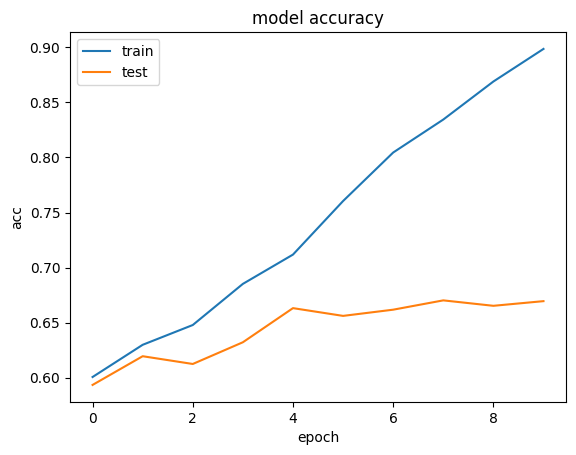

In [32]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

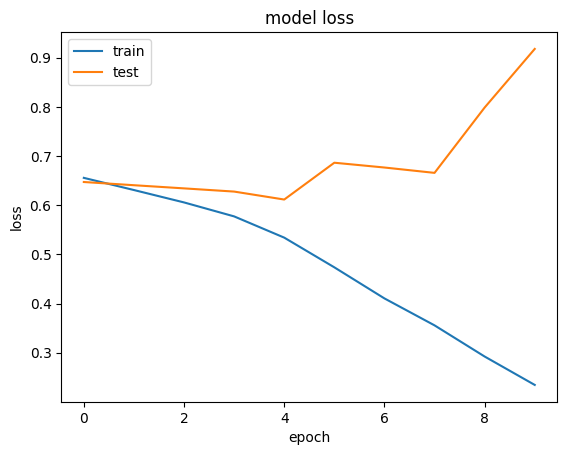

In [33]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
loss, accuracy = model.evaluate(X_test_2d, Y_test_norm)
print(f"Val accuracy={accuracy}  val loss={loss}")

45/45 [==============================] - 5s 113ms/step - loss: 0.9179 - accuracy: 0.6695
Val accuracy=0.6694855690002441  val loss=0.9178831577301025


45/45 [==============================] - 6s 109ms/step
Y_test_norm shape: (1419,)
y_pred shape: (1419, 2)


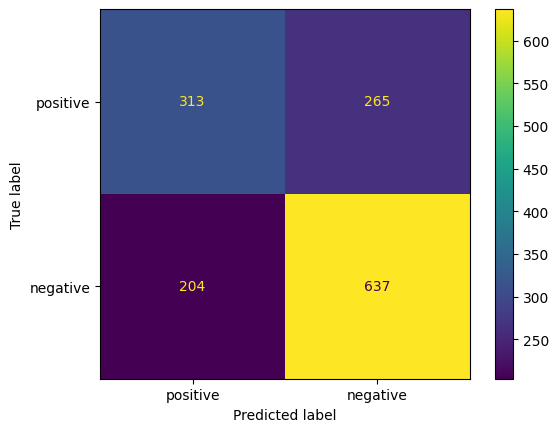

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming Y_test_norm is not one-hot encoded
y_pred_cnn = np.round(model.predict(X_test_2d))

# Check the dimensions of Y_test_norm and y_pred
print("Y_test_norm shape:", Y_test_norm.shape)
print("y_pred shape:", y_pred_cnn.shape)

# Use Y_test_norm directly for confusion matrix
confusion_matr_cnn = confusion_matrix(Y_test_norm, np.round(y_pred_cnn[:, 1]))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matr_cnn, display_labels=('positive','negative'))
cm_display.plot()


In [36]:
print(
    "True Positive for schizophrenia ", confusion_matr_cnn[0, 0], "\n",
    "False Negative for schizophrenia ", confusion_matr_cnn[0, 1], "\n",
    "False Positive For Healthy ", confusion_matr_cnn[1, 0], "\n",
    "True Neagtive For Healthy ", confusion_matr_cnn[1, 1], "\n")

True Positive for schizophrenia  313 
 False Negative for schizophrenia  265 
 False Positive For Healthy  204 
 True Neagtive For Healthy  637 



In [37]:
TP_cnn = confusion_matr_cnn[0, 0]
FN_cnn = confusion_matr_cnn[0, 1]
FP_cnn = confusion_matr_cnn[1, 0]
TN_cnn = confusion_matr_cnn[1, 1]
TP_cnn, FP_cnn, FN_cnn, TN_cnn

(313, 204, 265, 637)

In [38]:
sensitivity_cnn = TP_cnn / (TP_cnn + FN_cnn)
sensitivity_cnn

0.5415224913494809

In [39]:
specificity_cnn = TN_cnn / (TN_cnn + FP_cnn)
specificity_cnn

0.7574316290130797

In [41]:
from sklearn.metrics import f1_score, precision_score, recall_score
# Calculate F1 score, precision and recall scores
f1_cnn = f1_score(Y_test_norm, np.round(y_pred_cnn[:, 1]))
precision_cnn = precision_score(Y_test_norm, np.round(y_pred_cnn[:, 1]))
recall_cnn = recall_score(Y_test_norm, np.round(y_pred_cnn[:, 1]))

print("F1 Score: {:.2f}".format(f1_cnn))
print("Precision: {:.2f}".format(precision_cnn))
print("Recall: {:.2f}".format(recall_cnn))

F1 Score: 0.73
Precision: 0.71
Recall: 0.76


LSTM

In [42]:
from keras.optimizers import Adam
model=tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train_2d.shape[1],X_train_2d.shape[2])),
    tf.keras.layers.Dense(317,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

opt = Adam(0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
              )
    
his=model.fit(X_train_2d,Y_train_norm,batch_size=17,verbose=1,shuffle=True,epochs=15,validation_data=(X_test_2d, Y_test_norm))
acc=his.history['accuracy']

Epoch 1/15
334/334 [==============================] - 18s 36ms/step - loss: 0.6774 - accuracy: 0.5969 - val_loss: 0.6764 - val_accuracy: 0.5927
Epoch 2/15
334/334 [==============================] - 12s 37ms/step - loss: 0.6714 - accuracy: 0.5981 - val_loss: 0.6745 - val_accuracy: 0.5927
Epoch 3/15
334/334 [==============================] - 12s 36ms/step - loss: 0.6634 - accuracy: 0.5967 - val_loss: 0.6770 - val_accuracy: 0.5758
Epoch 4/15
334/334 [==============================] - 12s 35ms/step - loss: 0.6575 - accuracy: 0.5972 - val_loss: 0.6706 - val_accuracy: 0.5927
Epoch 5/15
334/334 [==============================] - 13s 40ms/step - loss: 0.6439 - accuracy: 0.6154 - val_loss: 0.6732 - val_accuracy: 0.5793
Epoch 6/15
334/334 [==============================] - 19s 56ms/step - loss: 0.6317 - accuracy: 0.6291 - val_loss: 0.6566 - val_accuracy: 0.6110
Epoch 7/15
334/334 [==============================] - 16s 49ms/step - loss: 0.6110 - accuracy: 0.6450 - val_loss: 0.6678 - val_accuracy:

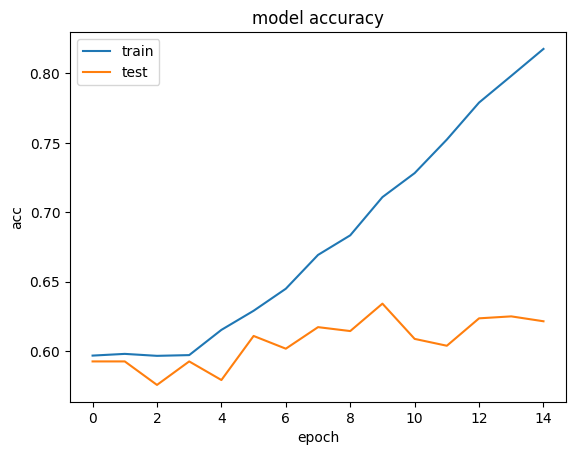

In [43]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

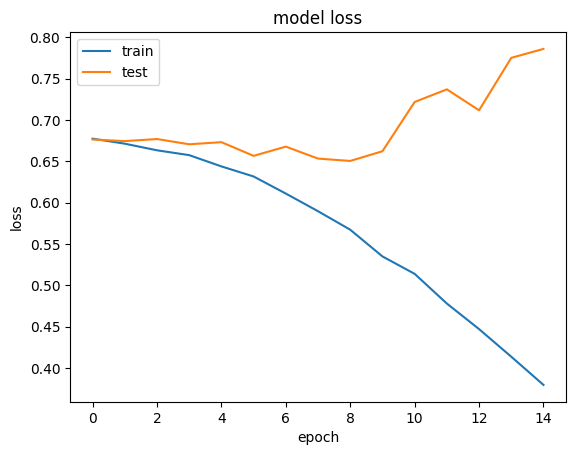

In [44]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
loss, accuracy = model.evaluate(X_test_2d, Y_test_norm)
print(f"Val accuracy={accuracy}  val loss={loss}")

45/45 [==============================] - 2s 34ms/step - loss: 0.7860 - accuracy: 0.6216
Val accuracy=0.621564507484436  val loss=0.7860470414161682


45/45 [==============================] - 3s 44ms/step
Y_test_norm shape: (1419,)
y_pred shape: (1419, 2)


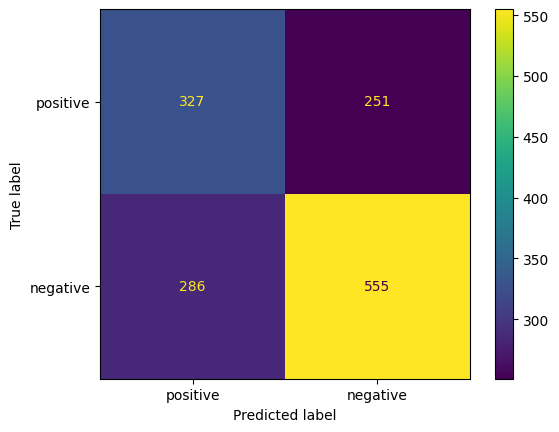

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming Y_test_norm is not one-hot encoded
y_pred_lstm = np.round(model.predict(X_test_2d))

# Check the dimensions of Y_test_norm and y_pred
print("Y_test_norm shape:", Y_test_norm.shape)
print("y_pred shape:", y_pred_lstm.shape)

# Use Y_test_norm directly for confusion matrix
confusion_matr_lstm = confusion_matrix(Y_test_norm, np.round(y_pred_lstm[:, 1]))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matr_lstm, display_labels=('positive','negative'))
cm_display.plot()

In [47]:
print(
    "True Positive for schizophrenia ", confusion_matr_lstm[0, 0], "\n",
    "False Negative for schizophrenia ", confusion_matr_lstm[0, 1], "\n",
    "False Positive For Healthy ", confusion_matr_lstm[1, 0], "\n",
    "True Neagtive For Healthy ", confusion_matr_lstm[1, 1], "\n")

True Positive for schizophrenia  327 
 False Negative for schizophrenia  251 
 False Positive For Healthy  286 
 True Neagtive For Healthy  555 



In [48]:
TP_lstm = confusion_matr_lstm[0, 0]
FN_lstm = confusion_matr_lstm[0, 1]
FP_lstm = confusion_matr_lstm[1, 0]
TN_lstm = confusion_matr_lstm[1, 1]
TP_lstm, FP_lstm, FN_lstm, TN_lstm

(327, 286, 251, 555)

In [49]:
sensitivity_lstm = TP_lstm / (TP_lstm + FN_lstm)
sensitivity_lstm

0.5657439446366782

In [51]:
specificity_lstm = TN_lstm / (TN_lstm + FP_lstm)
specificity_lstm

0.6599286563614745

In [52]:
from sklearn.metrics import f1_score, precision_score, recall_score
# Calculate F1 score, precision and recall scores
f1_lstm = f1_score(Y_test_norm, np.round(y_pred_lstm[:, 1]))
precision_lstm = precision_score(Y_test_norm, np.round(y_pred_lstm[:, 1]))
recall_lstm = recall_score(Y_test_norm, np.round(y_pred_lstm[:, 1]))

print("F1 Score: {:.2f}".format(f1_lstm))
print("Precision: {:.2f}".format(precision_lstm))
print("Recall: {:.2f}".format(recall_lstm))

F1 Score: 0.67
Precision: 0.69
Recall: 0.66


CNN + LSTM hybrid

In [ ]:
from keras.layers import Reshape
from keras.optimizers import Adam
model=tf.keras.models.Sequential([
    # CNN layers for spatial feature extraction
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(X_train_2d.shape[1],X_test_2d.shape[2],1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    Reshape((-1, 32)),
    # LSTM layers for temporal sequence processing
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(317,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

opt = Adam(0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
              )
    
his=model.fit(X_train_2d,Y_train_norm,batch_size=30,verbose=1,shuffle=True,epochs=10,validation_data=(X_test_2d, Y_test_norm))
acc=his.history['accuracy']